<a href="https://colab.research.google.com/github/phanikosanam/Covid-19-prediction/blob/main/Covid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Loading Dataset
covid = pd.read_csv('/content/Covid Dataset.csv')
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
#To check Null Value in Dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
#To count number of Yes and No in Covide-19 column
covid['COVID-19'].value_counts()

COVID-19
Yes    4383
No     1051
Name: count, dtype: int64

<Axes: xlabel='COVID-19', ylabel='count'>

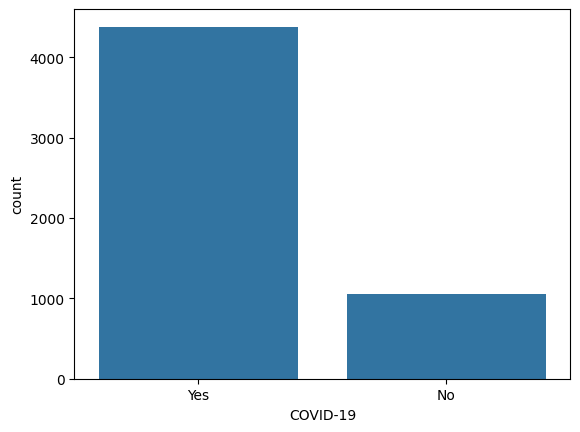

In [ ]:
#Distribution of target variable
sns.countplot(x='COVID-19',data=covid)

Text(0.5, 1.0, 'Percentage of COVID Positive')

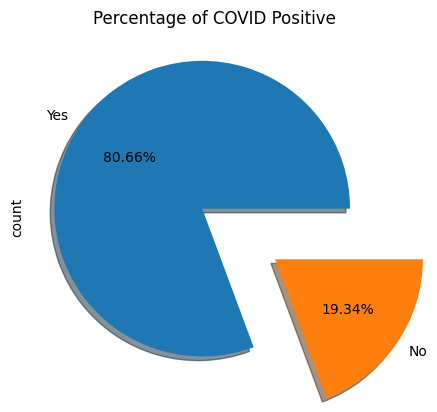

In [ ]:
#Distribution of target variable (COVID-19) in percentage
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.5],autopct='%1.2f%%',shadow=True)
plt.title('Percentage of COVID Positive')

In [ ]:
#Selecting features
features = covid.columns.tolist()
features.remove('COVID-19')
print(features)

['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']


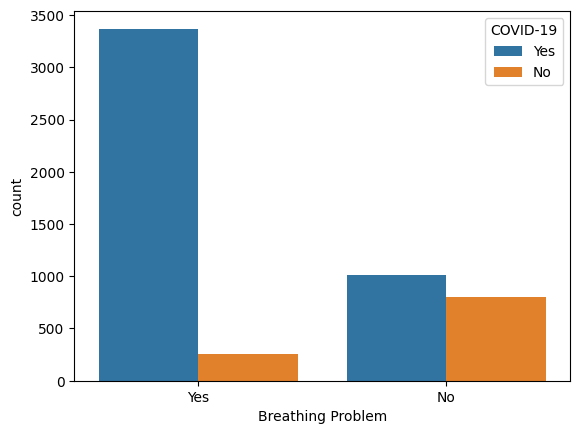

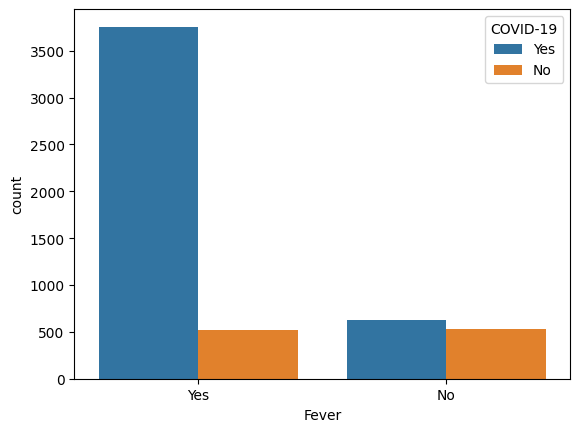

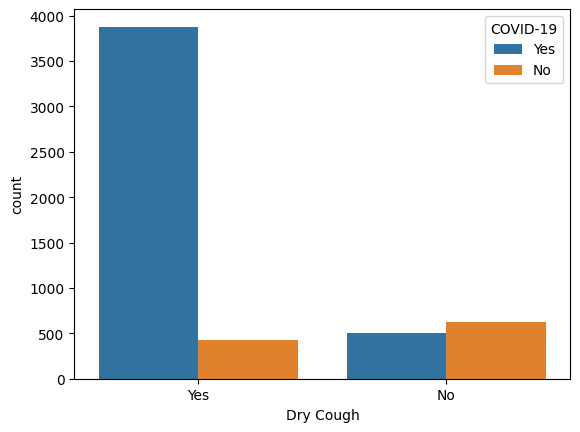

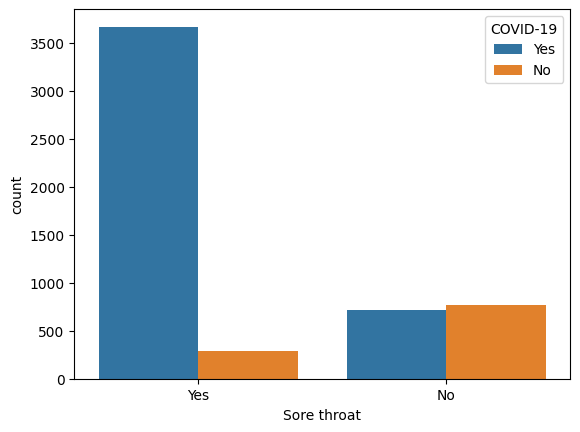

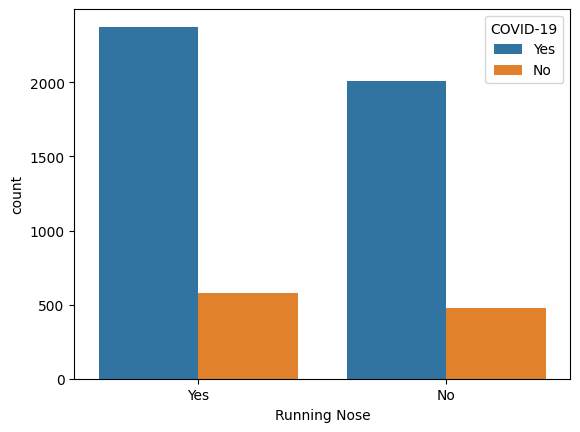

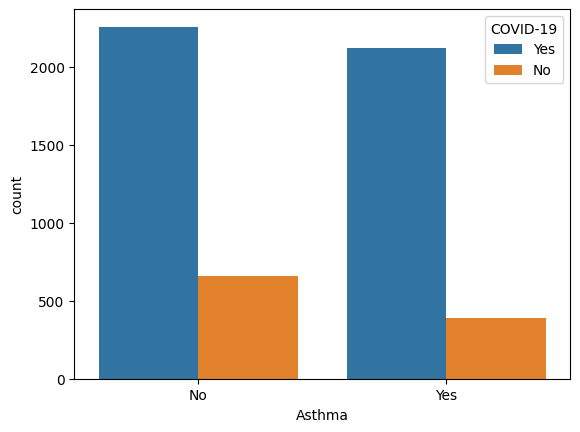

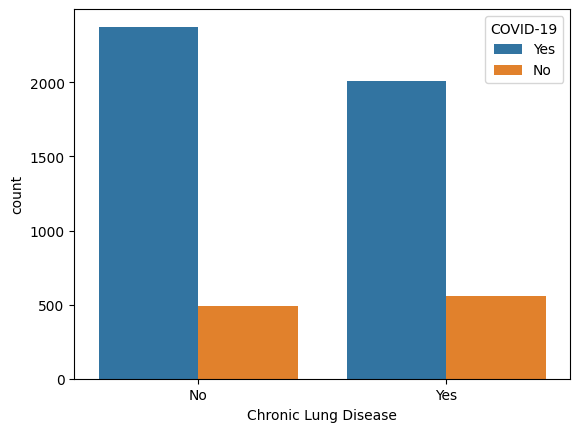

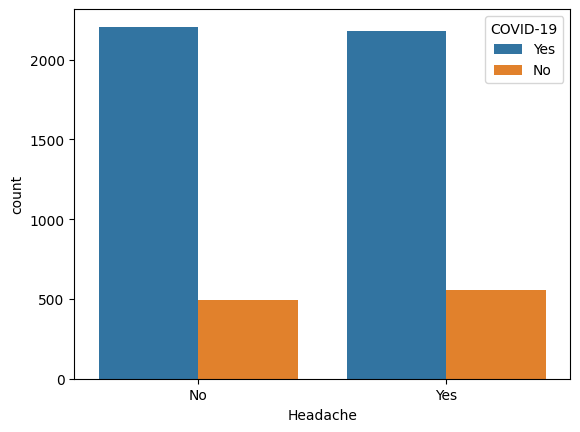

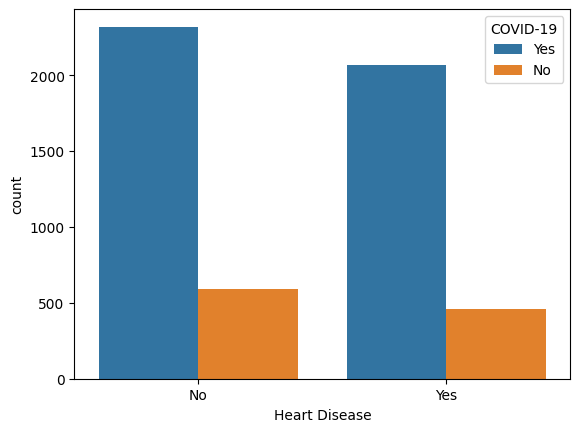

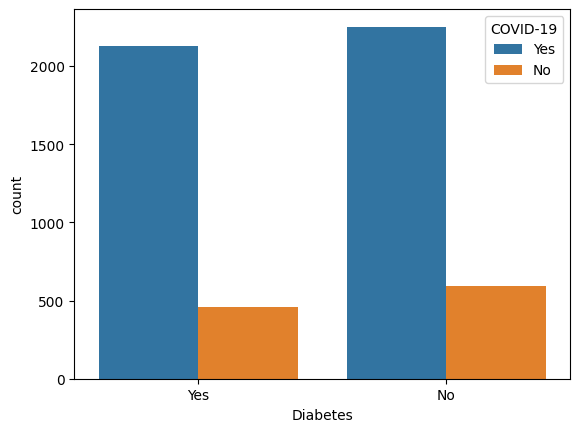

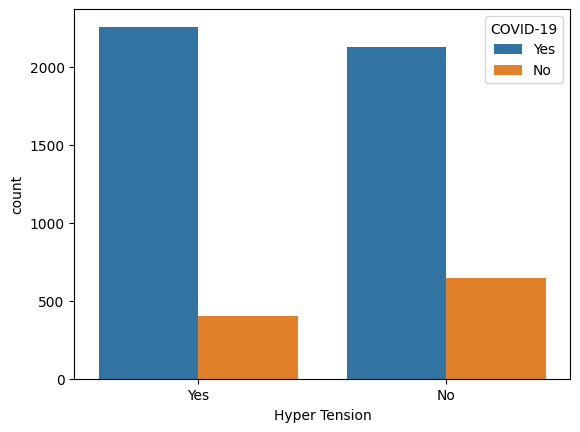

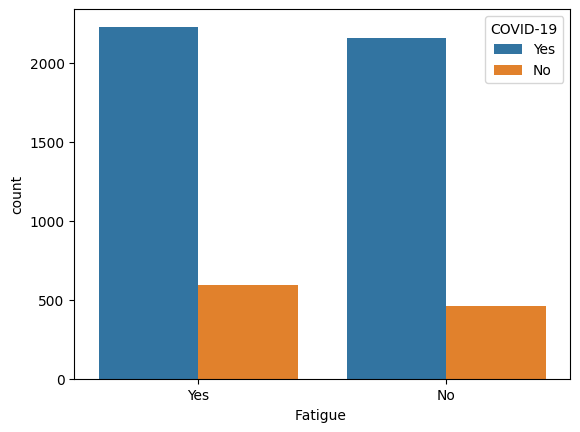

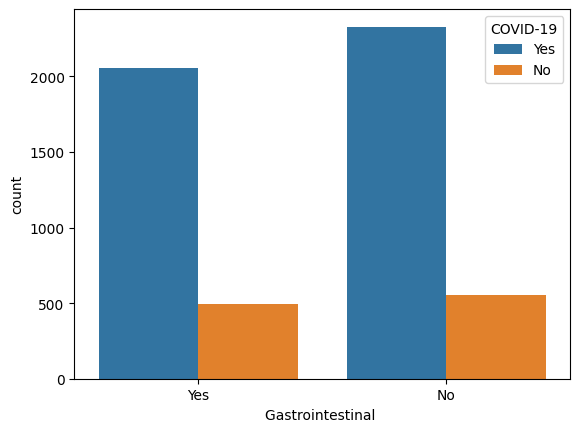

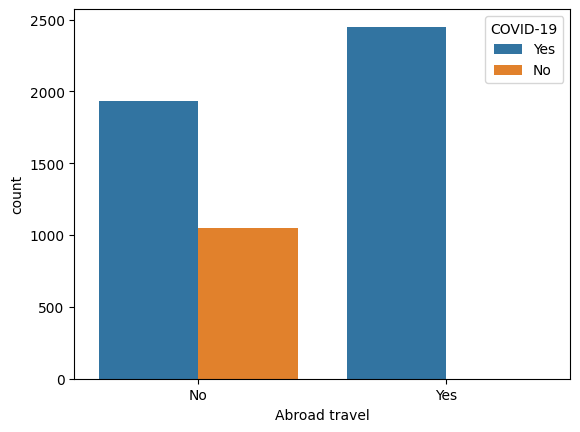

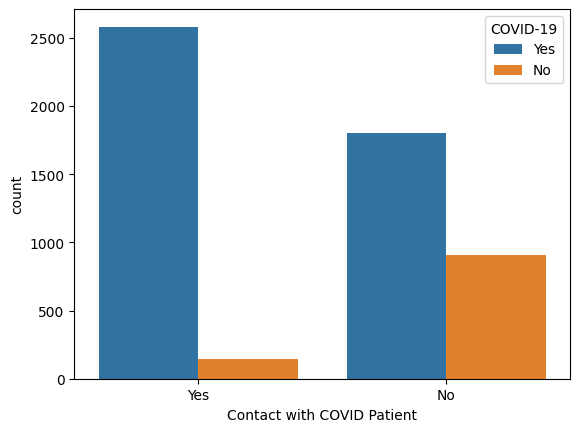

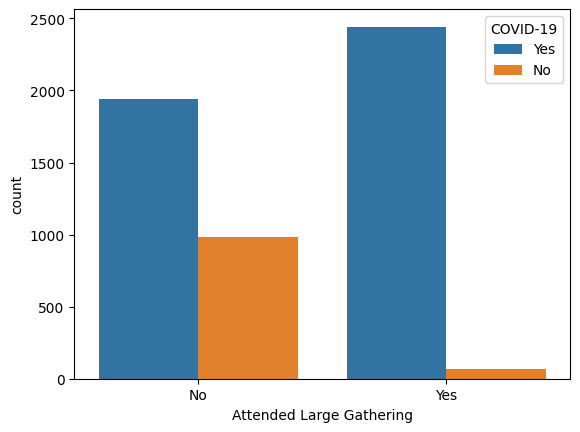

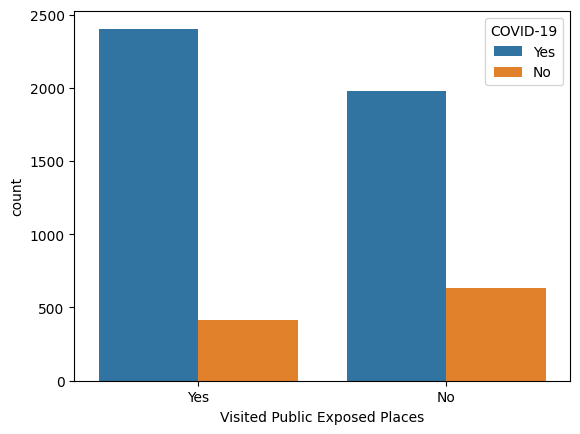

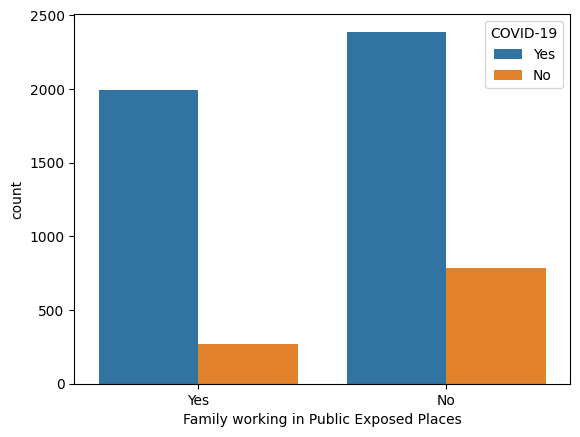

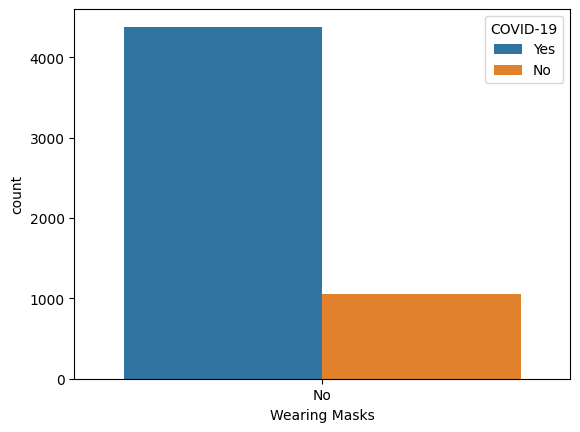

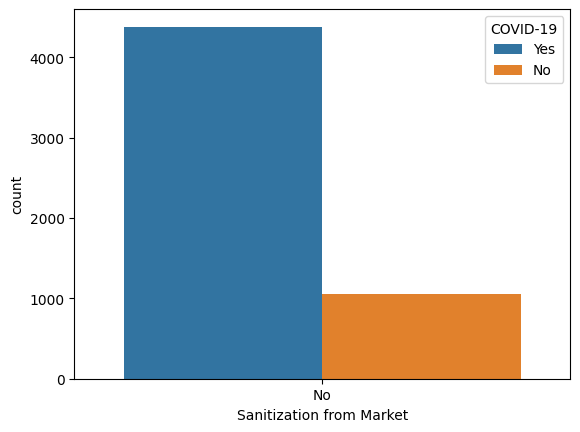

In [ ]:
#Graph between features and target variable
for feature in features:
    plt.figure()
    sns.countplot(x= feature,hue='COVID-19',data=covid)
    plt.savefig('covi-1.png')

In [ ]:
#Feature Transformation, This will transform the categorical values in the 'Dry Cough' column into numeric labels.
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
#Checking Null Value
covid.isnull()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
covid.dtypes.value_counts()

int64    21
Name: count, dtype: int64

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

In [ ]:
#To find correlation between all features
correlation=covid.corr()
correlation.style.background_gradient(cmap='PiYG',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [ ]:
#Removing unnecessary features
covid=covid.drop('Running Nose',axis=1)
covid=covid.drop('Asthma',axis=1)
covid=covid.drop('Chronic Lung Disease',axis=1)
covid=covid.drop('Headache',axis=1)
covid=covid.drop('Heart Disease',axis=1)
covid=covid.drop('Diabetes',axis=1)
covid=covid.drop('Fatigue ',axis=1)
covid=covid.drop('Gastrointestinal ',axis=1)
covid=covid.drop('Wearing Masks',axis=1)
covid=covid.drop('Sanitization from Market',axis=1)

In [ ]:
new=covid
new.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,0,1,1,0,1
2,1,1,1,1,0,1,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,0,1,0,1


In [ ]:
#Correlation after removing unnecessary features
correlation=new.corr()
correlation.style.background_gradient(cmap='PiYG',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


In [ ]:
new.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,0,1,1,0,1
2,1,1,1,1,0,1,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,0,1,0,1


# **Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [ ]:
x=new.drop('COVID-19',axis=1)
y=new['COVID-19']

In [ ]:
#Train-Test Split Validation (Ratio 75:25)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4075, 10) (1359, 10) (4075,) (1359,)


# **Support Vector Machine**

In [ ]:
#load the model
from sklearn import svm
#Create SVM classifier
clf = svm.SVC(kernel='poly', max_iter=10000) # Poly Kernel

In [ ]:
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
#Score/Accuracy
acc_svc=clf.score(x_test, y_test)*100
acc_svc

97.13024282560706

In [ ]:
#Accuracy, Precision, Recall and F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       261
           1       0.98      0.99      0.98      1098

    accuracy                           0.97      1359
   macro avg       0.96      0.94      0.95      1359
weighted avg       0.97      0.97      0.97      1359



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 234,   27],
       [  12, 1086]])

In [ ]:
#Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, y_pred)


0.02869757174392936

In [ ]:
#Calculate Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

0.16940357653818694
